# Interpolation test

In [295]:
import numpy as np
from scipy import interpolate as interp

In [315]:
#@title Calendar Aging Parametersa
#  soc parameters


def deg2(soc):
    a = 0.22773873
    b = 0.05369682
    c = 2.30882327
    d = -0.15441163
    e = -0.83467311
    f = 1.41733655

    x = np.array([ a,  b,  c, d, e , f])
    if soc < 0:
        raise ValueError()
    elif soc <= 0.1:
        return x[0:2].dot([soc, 1])
    elif soc <= 0.50:
        return x[2:4].dot([soc, 1])
    elif soc <= 1.0:
        return x[4:6].dot([soc, 1])
    else:
        raise ValueError()

def f_T(Ea, T):
    R = 8.314462
    return np.exp(-Ea / R / T) / temp_scale 

def new_alpha_function(k, Ea, SoC, T):
    return k[0] * f_soc(SoC) * k[1] * f_T(Ea, T)

In [296]:
def deg(SoC):
    f_soc = None

    if SoC < 0:
        if error == "raise":
            raise ValueError(f"SoC cannot be less than 0. Provided {SoC}.")
        elif error == "warn":
            warn(f"SoC cannot be less than 0. Provided {SoC}.")
    elif SoC <= 0.5:
        f_soc = np.array([0.05403742, 0.05272258]).dot([SoC, 1])
    elif SoC <= 0.65:
        f_soc = np.array([0.31674977, -0.07863359]).dot([SoC, 1])
    elif SoC <= 0.8:
        f_soc = np.array([1.45949217, -0.82141616]).dot([SoC, 1])
    elif SoC <= 1.0:
        f_soc = np.array([3.2691121, -2.2691121]).dot([SoC, 1])
    else:
        if error == "raise":
            raise ValueError(f"SoC cannot be greater than 1. Provided {SoC}.")
        elif error == "warn":
            warn(f"SoC cannot be greater than 1. Provided {SoC}.")
    return f_soc

In [330]:
socs = None
socs = np.array([0,0.25,0.5, 0.65, 0.8, 1.0])

In [331]:
a = []
for v in socs:
    a.append(deg2(v))
print(a)
print(socs)

[0.05369682, 0.4227941875, 1.000000005, 0.8747990284999999, 0.7495980619999999, 0.5826634399999999]
[0.   0.25 0.5  0.65 0.8  1.  ]


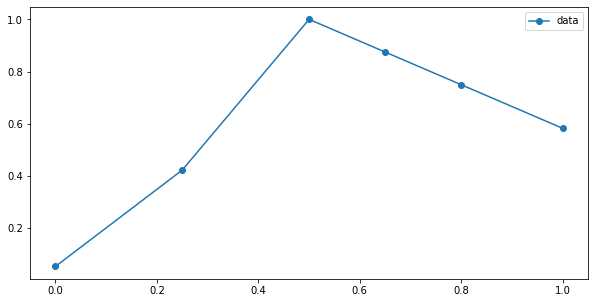

In [332]:
import matplotlib.pyplot as plt
plt.plot( socs, a, 'o-')
plt.legend(['data', 'linear'], loc='best')
plt.show()

In [333]:
xnew = np.linspace(0, 1, num=30, endpoint=True)

In [334]:
f = interpolate.interp1d(socs, a)

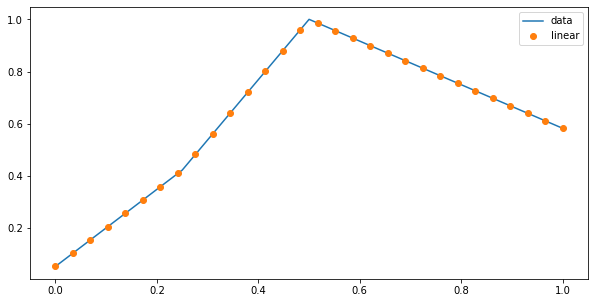

In [335]:
plt.rcParams['figure.figsize'] = [10, 5
                                 ]
plt.plot(socs,f(socs),'-',xnew,f(xnew),'o')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()